In [895]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from itertools import combinations
import random

In [896]:
tickers_1m = {
    "SOL_1m"  : "../Data/1m_Data/SOL_USDC_USDC_1m.csv",
    "ETH_1m"  : "../Data/1m_Data/ETH_USDC_USDC_1m.csv",
    "BTC_1m"  : "../Data/1m_Data/BTC_USDC_USDC_1m.csv",
    "AVAX_1m" : "../Data/1m_Data/AVAX_USDC_USDC_1m.csv",
    "NEAR_1m" : "../Data/1m_Data/NEAR_USDC_USDC_1m.csv",
    "OP_1m"   : "../Data/1m_Data/OP_USDC_USDC_1m.csv",
    "ARB_1m"  : "../Data/1m_Data/ARB_USDC_USDC_1m.csv",
    "LDO_1m"  : "../Data/1m_Data/LDO_USDC_USDC_1m.csv",
    "LINK_1m" : "../Data/1m_Data/LINK_USDC_USDC_1m.csv",
    "AAVE_1m" : "../Data/1m_Data/AAVE_USDC_USDC_1m.csv"
}

tickers_3m = {
    "SOL_3m"  : "../Data/3m_Data/SOL_USDC_USDC_3m.csv",
    "ETH_3m"  : "../Data/3m_Data/ETH_USDC_USDC_3m.csv",
    "BTC_3m"  : "../Data/3m_Data/BTC_USDC_USDC_3m.csv",
    "AVAX_3m" : "../Data/3m_Data/AVAX_USDC_USDC_3m.csv",
    "NEAR_3m" : "../Data/3m_Data/NEAR_USDC_USDC_3m.csv",
    "OP_3m"   : "../Data/3m_Data/OP_USDC_USDC_3m.csv",
    "ARB_3m"  : "../Data/3m_Data/ARB_USDC_USDC_3m.csv",
    "LDO_3m"  : "../Data/3m_Data/LDO_USDC_USDC_3m.csv",
    "LINK_3m" : "../Data/3m_Data/LINK_USDC_USDC_3m.csv",
    "AAVE_3m" : "../Data/3m_Data/AAVE_USDC_USDC_3m.csv"
}

tickers_5m = {
    "SOL_5m"  : "../Data/5m_Data/SOL_USDC_USDC_5m.csv",
    "ETH_5m"  : "../Data/5m_Data/ETH_USDC_USDC_5m.csv",
    "BTC_5m"  : "../Data/5m_Data/BTC_USDC_USDC_5m.csv",
    "AVAX_5m" : "../Data/5m_Data/AVAX_USDC_USDC_5m.csv",
    "NEAR_5m" : "../Data/5m_Data/NEAR_USDC_USDC_5m.csv",
    "OP_5m"   : "../Data/5m_Data/OP_USDC_USDC_5m.csv",
    "ARB_5m"  : "../Data/5m_Data/ARB_USDC_USDC_5m.csv",
    "LDO_5m"  : "../Data/5m_Data/LDO_USDC_USDC_5m.csv",
    "LINK_5m" : "../Data/5m_Data/LINK_USDC_USDC_5m.csv",
    "AAVE_5m" : "../Data/5m_Data/AAVE_USDC_USDC_5m.csv"
}

tickers_15m = {
    "SOL_15m"  : "../Data/15m_Data/SOL_USDC_USDC_15m.csv",
    "ETH_15m"  : "../Data/15m_Data/ETH_USDC_USDC_15m.csv",
    "BTC_15m"  : "../Data/15m_Data/BTC_USDC_USDC_15m.csv",
    "AVAX_15m" : "../Data/15m_Data/AVAX_USDC_USDC_15m.csv",
    "NEAR_15m" : "../Data/15m_Data/NEAR_USDC_USDC_15m.csv",
    "OP_15m"   : "../Data/15m_Data/OP_USDC_USDC_15m.csv",
    "ARB_15m"  : "../Data/15m_Data/ARB_USDC_USDC_15m.csv",
    "LDO_15m"  : "../Data/15m_Data/LDO_USDC_USDC_15m.csv",
    "LINK_15m" : "../Data/15m_Data/LINK_USDC_USDC_15m.csv",
    "AAVE_15m" : "../Data/15m_Data/AAVE_USDC_USDC_15m.csv"
}

tickers_1h = {
    "SOL_1h"  : "../Data/1h_Data/SOL_USDC_USDC_1h.csv",
    "ETH_1h"  : "../Data/1h_Data/ETH_USDC_USDC_1h.csv",
    "BTC_1h"  : "../Data/1h_Data/BTC_USDC_USDC_1h.csv",
    "AVAX_1h" : "../Data/1h_Data/AVAX_USDC_USDC_1h.csv",
    "NEAR_1h" : "../Data/1h_Data/NEAR_USDC_USDC_1h.csv",
    "OP_1h"   : "../Data/1h_Data/OP_USDC_USDC_1h.csv",
    "ARB_1h"  : "../Data/1h_Data/ARB_USDC_USDC_1h.csv",
    "LDO_1h"  : "../Data/1h_Data/LDO_USDC_USDC_1h.csv",
    "LINK_1h" : "../Data/1h_Data/LINK_USDC_USDC_1h.csv",
    "AAVE_1h" : "../Data/1h_Data/AAVE_USDC_USDC_1h.csv"
}

tickers_4h = {
    "SOL_4h"  : "../Data/4h_Data/SOL_USDC_USDC_4h.csv",
    "ETH_4h"  : "../Data/4h_Data/ETH_USDC_USDC_4h.csv",
    "BTC_4h"  : "../Data/4h_Data/BTC_USDC_USDC_4h.csv",
    "AVAX_4h" : "../Data/4h_Data/AVAX_USDC_USDC_4h.csv",
    "NEAR_4h" : "../Data/4h_Data/NEAR_USDC_USDC_4h.csv",
    "OP_4h"   : "../Data/4h_Data/OP_USDC_USDC_4h.csv",
    "ARB_4h"  : "../Data/4h_Data/ARB_USDC_USDC_4h.csv",
    "LDO_4h"  : "../Data/4h_Data/LDO_USDC_USDC_4h.csv",
    "LINK_4h" : "../Data/4h_Data/LINK_USDC_USDC_4h.csv",
    "AAVE_4h" : "../Data/4h_Data/AAVE_USDC_USDC_4h.csv"
}

In [897]:
base_symbol = "SOL"
quote_symbol = "LINK"
timeframe = "1h"

ticker_map = {
    "1m": tickers_1m,
    "3m": tickers_3m,
    "5m": tickers_5m,
    "15m": tickers_15m,
    "1h" : tickers_1h,
    "4h" : tickers_4h
}

base_df = pd.read_csv(ticker_map[timeframe][f"{base_symbol}_{timeframe}"])
quote_df = pd.read_csv(ticker_map[timeframe][f"{quote_symbol}_{timeframe}"])

base_close = base_df['close']
quote_close = quote_df['close']

In [898]:

base_close_series = base_close
quote_close_series = quote_close

shared_timestamps = base_close_series.index.intersection(quote_close_series.index)

base_price_aligned = base_close_series.loc[shared_timestamps]
quote_price_aligned = quote_close_series.loc[shared_timestamps]


first_axis = base_price_aligned.to_numpy()
second_axis = quote_price_aligned.to_numpy()


/var/folders/c_/_ctxnkln1z76h710t7sk2rk40000gn/T/ipykernel_38316/2723351006.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


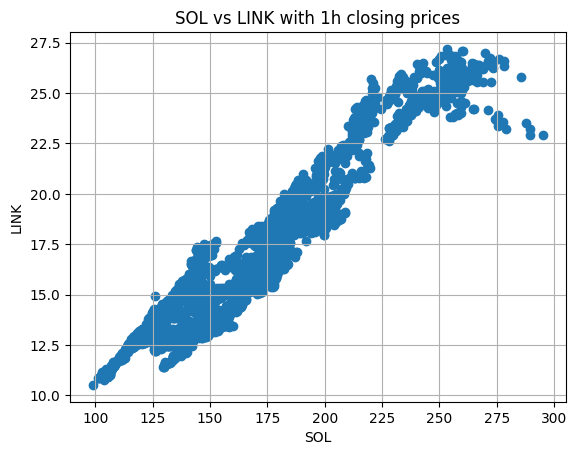

In [899]:
fig, ax = plt.subplots()
ax.scatter(first_axis,second_axis)
ax.set_xlabel(base_symbol)
ax.set_ylabel(quote_symbol)
ax.set_title(f"{base_symbol} vs {quote_symbol} with {timeframe} closing prices")
ax.grid(True)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

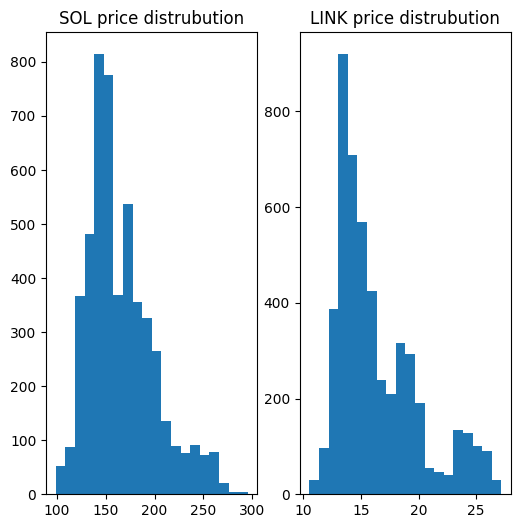

In [900]:
bins = 20

fig,(base_hist,quote_hist) = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
base_hist.hist(first_axis,bins=bins)
base_hist.set_title(f"{base_symbol} price distrubution")

quote_hist.hist(second_axis,bins=bins)
quote_hist.set_title(f"{quote_symbol} price distrubution")

plt.show


In [901]:
price_matrix = np.column_stack(
    [first_axis,second_axis]
)
print(price_matrix.shape)

(5003, 2)


In [902]:

price_centered_matrix = price_matrix - price_matrix.mean(axis=0)
print(price_centered_matrix.shape)

(5003, 2)


In [903]:
covariance_matrix = np.cov(price_matrix,rowvar=False)
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)

print(np.array2string(covariance_matrix, formatter={'float_kind':lambda x: "%.10f" % x}))

[[1163.0054725668 116.4919183984]
 [116.4919183984 13.0858601426]]


In [904]:
U,Singular_Vals,V_Trans = np.linalg.svd(price_centered_matrix,full_matrices=False)

principal_vector_one = V_Trans[0]
principal_vector_two = V_Trans[1]

print(principal_vector_two)


[ 0.09978504 -0.99500902]


In [905]:
n = len(price_centered_matrix[:,0])

singular_vals_squared = [v**2 for v in Singular_Vals]

lambda_1 = singular_vals_squared[0] / (n-1)
lambda_2 = singular_vals_squared[1] / (n-1)

total_variance = lambda_1 + lambda_2
lambda_1_var = lambda_1/total_variance
lambda_2_var = lambda_2/total_variance

print(f"Total variance is {total_variance:.10f}")
print(f"lambda one explains {lambda_1_var * 100:.10f}%")
print(f"lambda two explains {lambda_2_var * 100:.10f}%")

Total variance is 1176.0913327093
lambda one explains 99.8806723253%
lambda two explains 0.1193276747%


In [906]:
residual_vector = price_centered_matrix @ principal_vector_two

print(residual_vector.shape)

(5003,)


In [907]:
result = adfuller(residual_vector)

adf_stat = result[0]
p_value = result[1]

used_lags = result[2]
n_obs = result[3]

critical_values = result[4]

print(f"ADF Statistic: {adf_stat:.10f}")
print(f"p-value: {p_value:.10f}")
print(f"Used Lags: {used_lags}")
print(f"Number of Observations: {n_obs}")
print("Critical Values:")
for key, value in critical_values.items():
       print(f"    {key}: {value}")

ADF Statistic: -4.0483083978
p-value: 0.0011776423
Used Lags: 32
Number of Observations: 4970
Critical Values:
    1%: -3.4316664347445838
    5%: -2.862121721032689
    10%: -2.5670796509438927


In [908]:
# bins = 50
# fig,(base_hist) = plt.subplots()
# base_hist.hist(residual_vector,bins=bins)
# base_hist.set_title("Residual Histogram")

# row_i = price_matrix[np.random.randint(price_matrix.shape[0])]
# mean_vector = price_matrix.mean(axis=0)
# residual_vector_std = residual_vector.std()
# residual_mean = residual_vector.mean()
# random_residual = (row_i - mean_vector) @ principal_vector_two
# z_score = (random_residual - residual_mean) / residual_vector_std

# base_hist.axvline(z_score,color='red',linestyle="--",label=f'Random z = {z_score:.10f}')
# base_hist.legend()

# spread = abs(row_i[0] - row_i[1])
# mean_spread = abs(mean_vector[0] - mean_vector[1])
# total_spread = abs(mean_spread - spread)

# lower_threshold = 0.3 
# upper_threshold = -0.3  

# if upper_threshold < z_score < lower_threshold:
#     print(f"The spread is {spread}")
#     print(f"The mean spread is {mean_spread}")
#     print(f"The total spread is {total_spread}")

In [909]:
print(base_df.columns)
print(quote_df.columns)


Index(['timestamp', 'open', 'close', 'high', 'low', 'volume'], dtype='object')
Index(['timestamp', 'open', 'close', 'high', 'low', 'volume'], dtype='object')


In [910]:
base_df['timestamp'] = pd.to_datetime(base_df['timestamp'])
quote_df['timestamp'] = pd.to_datetime(quote_df['timestamp'])

base_df = base_df[['timestamp','close']].rename(columns={"close": "close_base_price"})
quote_df = quote_df[['timestamp','close']].rename(columns={"close":"close_quote_price"})

merged_df = pd.merge(base_df,quote_df,on='timestamp',how='inner')


In [911]:
spreads = np.abs(merged_df['close_base_price'].values - merged_df['close_quote_price'].values)

mean_spreads = pd.Series(spreads).expanding(min_periods=20).mean().values
rolling_std   = pd.Series(spreads).expanding(min_periods=20).std().values

z_scores = (spreads - mean_spreads) / rolling_std

merged_df['spread'] = spreads
merged_df['mean_spreads'] = mean_spreads
merged_df['z_score'] = z_scores



In [912]:
merged_df.to_csv(f"../Data/Z_Score_data_{base_symbol}_{quote_symbol}_{timeframe}.csv",index=False)

print(merged_df.columns)

Index(['timestamp', 'close_base_price', 'close_quote_price', 'spread',
       'mean_spreads', 'z_score'],
      dtype='object')


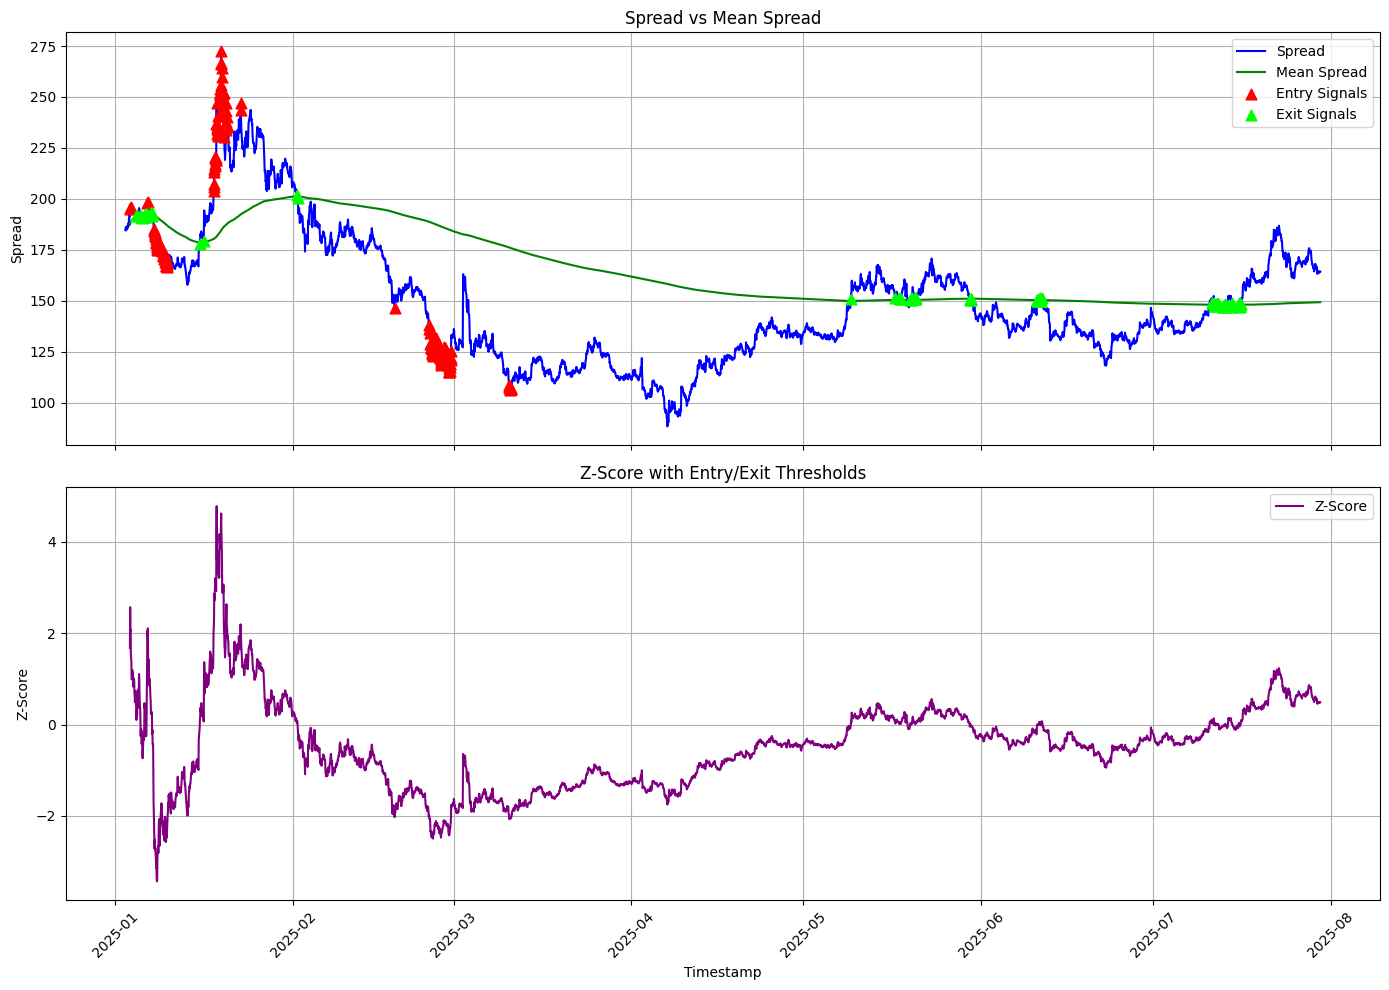

In [913]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# ------------------------------
# Top Plot: Spread + Mean Spread
# ------------------------------
ax1.plot(merged_df['timestamp'], merged_df['spread'], label='Spread', color='blue')
ax1.plot(merged_df['timestamp'], merged_df['mean_spreads'], label='Mean Spread', color='green')
ax1.set_ylabel("Spread")
ax1.set_title("Spread vs Mean Spread")
ax1.legend()
ax1.grid(True)

# ------------------------------
# Bottom Plot: Z-Score + Thresholds
# ------------------------------

ax2.plot(merged_df['timestamp'], merged_df['z_score'], label='Z-Score', color='purple')
ax2.set_ylabel("Z-Score")
ax2.set_title("Z-Score with Entry/Exit Thresholds")
ax2.legend()
ax2.grid(True)

# X-axis
ax2.set_xlabel("Timestamp")
plt.setp(ax2.get_xticklabels(), rotation=45)

## ------------------------------
# Plot: Entry Signals
# ------------------------------
entry_threshold = 2
epsilon = 1

entry_signals = merged_df[abs(merged_df['z_score']) > entry_threshold]
exit_signals = merged_df[
    abs(merged_df['spread'] - merged_df['mean_spreads']) < epsilon
]

ax1.scatter(entry_signals['timestamp'],entry_signals['spread'],color='red',marker="^",label='Entry Signals', s=60, zorder=10)
ax1.scatter(exit_signals['timestamp'],exit_signals['spread'],color='lime',marker="^",label='Exit Signals', s=60, zorder=10)
ax1.legend()





plt.tight_layout()
plt.show()
